In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
# train mô hình ML
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# thư viện suy diễn hồi quy tuyến tính
import statsmodels.api as sm

In [2]:
conn = sqlite3.connect('database.sqlite')

In [3]:
# tạo các bảng dữ liệu
countries = pd.read_sql("""SELECT * FROM Country""", conn)
Player = pd.read_sql("""SELECT * FROM Player""", conn)
Match = pd.read_sql("""SELECT * FROM Match""", conn)
League = pd.read_sql("""SELECT * FROM League""", conn)
Team = pd.read_sql("""SELECT * FROM Team""", conn)
Player_Attributes = pd.read_sql("""SELECT * FROM Player_Attributes""", conn)
Team_Attributes = pd.read_sql("""SELECT * FROM Team_Attributes""", conn)

In [4]:
query = """SELECT Match.id, 
                    Country.name AS country_name, 
                    League.name AS league_name,                     
                    HT.team_long_name AS  home_team,
                    AT.team_long_name AS away_team                                                           
            FROM Match
            JOIN Country on Country.id = Match.country_id
            JOIN League on League.id = Match.league_id
            LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
            LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
            """

detailed_matches = pd.read_sql(query, conn)

In [5]:
detailed_matches.head()

,id,country_name,league_name,home_team,away_team
0,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,3,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,4,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons
4,5,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège


In [6]:
pd.set_option('display.max_columns', None) # hiển thị tất cả các cột trong dataframe

In [7]:
detailed_matches = pd.merge(detailed_matches, Match, on='id')

In [8]:
detailed_matches.head()

,id,country_name,league_name,home_team,away_team,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,N

In [9]:
def getResultWinLoss(match_info):
    if match_info['home_team_goal'] > match_info['away_team_goal']:
        home_team_result = "Win"
        away_team_result = "Loss"
    elif match_info['home_team_goal'] < match_info['away_team_goal']:
        home_team_result = "Loss"
        away_team_result = "Win"
    else: 
        home_team_result = "Draw"
        away_team_result = "Draw"
    return [home_team_result, away_team_result]

detailed_matches[['home_team_result', 'away_team_result']] = detailed_matches[['home_team_goal', 'away_team_goal']].apply(getResultWinLoss, axis = 1, result_type='expand')

In [10]:
detailed_matches.head(2)

,id,country_name,league_name,home_team,away_team,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_result,away_team_result
0,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.4,5.0,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.70,3.3,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2,Draw,Draw
1,2,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.2,3.6,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN,1.83,3.3,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6,Draw,Draw


In [64]:
cross_tab_prop = pd.crosstab(index=detailed_matches['league_name'],
                             columns=detailed_matches['home_team_result'],
                             normalize="index")
cross_tab_prop

home_team_result,Draw,Loss,Win
league_name,,,
Belgium Jupiler League,0.245949,0.285301,0.468750
England Premier League,0.257566,0.285197,0.457237
France Ligue 1,0.282566,0.270395,0.447039
Germany 1. Bundesliga,0.243873,0.303922,0.452206
Italy Serie A,0.263838,0.269804,0.466357
Netherlands Eredivisie,0.237337,0.284314,0.478350
Poland Ekstraklasa,0.273438,0.273438,0.453125
Portugal Liga ZON Sagres,0.259747,0.297758,0.442495
Scotland Premier League,0.245066,0.338268,0.416667


In [48]:
cross_tab = pd.crosstab(index=detailed_matches['league_name'],
                        columns=detailed_matches['home_team_result'])
cross_tab

home_team_result,Draw,Loss,Win
league_name,,,
Belgium Jupiler League,425,493,810
England Premier League,783,867,1390
France Ligue 1,859,822,1359
Germany 1. Bundesliga,597,744,1107
Italy Serie A,796,814,1407
Netherlands Eredivisie,581,696,1171
Poland Ekstraklasa,525,525,870
Portugal Liga ZON Sagres,533,611,908
Scotland Premier League,447,617,760


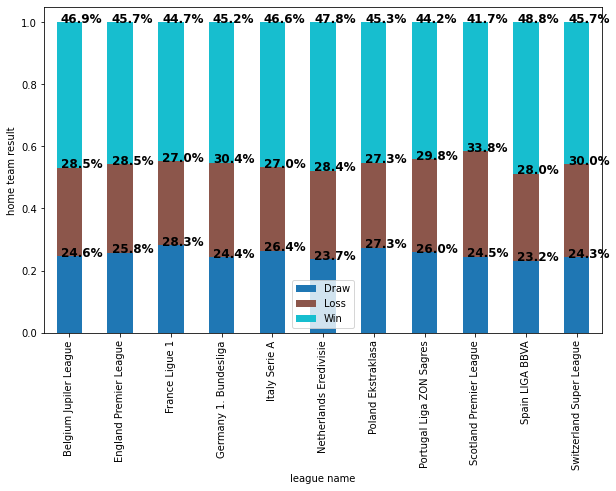

In [62]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower center", ncol=1) # điều chỉnh vị trí của legend
plt.xlabel("league name")
plt.ylabel("home team result")
# add value to bar
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show()

In [13]:
detailed_matches.head()

,id,country_name,league_name,home_team,away_team,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_result,away_team_result
0,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,Draw,Draw
1,2,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,Draw,Draw
2,3,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,Loss,Win
3,4,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,Win,Loss
4,5,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Tỷ lệ cá cược có ảnh hưởng đến kết quả của trận đấu

In [14]:
detailed_matches_home=detailed_matches.copy().drop(['home_team_result', 'away_team_result'], axis=1)

In [15]:
def getResultWinLoss_2(match_info):
    if match_info['home_team_goal'] > match_info['away_team_goal']:
        home_team_result = 3
        away_team_result = 0
    elif match_info['home_team_goal'] < match_info['away_team_goal']:
        home_team_result = 0
        away_team_result = 3
    else: 
        home_team_result = 1
        away_team_result = 1
    return [home_team_result, away_team_result]

detailed_matches_home[['home_team_result', 'away_team_result']] = detailed_matches_home[['home_team_goal', 'away_team_goal']].apply(getResultWinLoss_2, axis = 1, result_type='expand')


In [16]:
detailed_matches_home=detailed_matches_home[['B365H',
'B365D',
'B365A',
'BWH',
'BWD',
'BWA',
'IWH',
'IWD',
'IWA',
'LBH',
'LBD',
'LBA',
'PSH',
'PSD',
'PSA',
'WHH',
'WHD',
'WHA',
'SJH',
'SJD',
'SJA',
'VCH',
'VCD',
'VCA',
'GBH',
'GBD',
'GBA',
'BSH',
'BSD',
'BSA','home_team_result', 'away_team_result']].dropna()

In [17]:
detailed_matches_home

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_result,away_team_result
997,2.38,3.25,3.00,2.45,3.30,2.70,2.30,3.1,2.60,2.38,3.2,2.75,2.48,3.52,2.96,2.30,3.30,2.80,2.38,3.30,2.88,2.40,3.40,2.90,2.45,3.30,2.70,2.40,3.25,2.70,0,3
998,1.80,3.60,4.33,1.75,3.70,4.20,1.80,3.2,3.70,1.73,3.4,4.33,1.83,3.79,4.63,1.73,3.50,4.33,1.73,3.60,4.50,1.80,3.60,4.50,1.75,3.70,4.20,1.80,3.50,4.00,3,0
999,1.65,3.80,5.00,1.67,3.60,5.00,1.65,3.3,4.40,1.67,3.5,4.50,1.74,3.82,5.20,1.57,3.60,5.50,1.62,3.60,5.50,1.70,3.70,5.00,1.67,3.60,5.00,1.70,3.50,4.50,0,3
1000,1.50,4.00,7.00,1.53,3.90,6.00,1.50,3.7,5.00,1.50,3.8,6.00,1.58,4.27,6.25,1.50,3.80,6.00,1.50,4.00,6.00,1.57,3.90,6.00,1.53,3.90,6.00,1.50,3.80,6.00,3,0
1001,1.29,5.25,10.00,1.25,5.50,10.00,1.25,4.5,9.00,1.25,5.0,10.00,1.29,5.74,12.41,1.25,5.00,11.00,1.25,5.50,11.00,1.25,5.50,12.00,1.25,5.50,10.00,1.25,5.50,9.00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,2.00,3.40,3.75,2.00,3.20,3.90,1.85,3.5,3.95,1.90,3.3,4.00,2.09,3.50,3.91,2.05,3.30,3.75,2.05,3.30,3.80,2.05,3.50,3.90,2.00,3.20,3.90,2.00,3.40,3.50,3,0
23413,3.00,3.25,2.38,3.30,3.20,2.35,2.90,3.3,2.30,2.88,3.3,2.30,3.20,3.42,2.41,3.00,3.25,2.38,3.12,3.20,2.38,3.20,3.40,2.38,3.30,3.20,2.35,2.88,3.30,2.38,3,0
23414,8.00,4.50,1.40,8.75,4.75,1.40,7.60,4.8,1.35,8.00,4.5,1.36,9.15,5.34,1.38,9.00,4.50,1.36,9.00,5.25,1.33,9.00,5.25,1.36,8.75,4.75,1.40,8.50,4.50,1.36,0,3
23415,1.91,3.50,4.00,1.90,3.40,4.00,2.00,3.3,3.60,1.95,3.4,3.60,1.97,3.62,4.23,1.95,3.40,3.80,1.95,3.50,3.80,1.95,3.60,4.20,1.90,3.40,4.00,1.91,3.50,3.75,1,1


In [18]:
detailed_matches_home[['home_team_result','B365H',
'B365D',
'B365A',
'BWH',
'BWD',
'BWA',
'IWH',
'IWD',
'IWA',
'LBH',
'LBD',
'LBA',
'PSH',
'PSD',
'PSA',
'WHH',
'WHD',
'WHA',
'SJH',
'SJD',
'SJA',
'VCH',
'VCD',
'VCA',
'GBH',
'GBD',
'GBA',
'BSH',
'BSD',
'BSA']].corr()

,home_team_result,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
home_team_result,1.000000,-0.316680,0.187121,0.329903,-0.314136,0.190229,0.334702,-0.319147,0.196850,0.334457,-0.319050,0.194249,0.331434,-0.309231,0.185627,0.323672,-0.315796,0.182353,0.323274,-0.317012,0.191153,0.327575,-0.311643,0.189765,0.315099,-0.314136,0.190229,0.334702,-0.317662,0.195015,0.332425
B365H,-0.316680,1.000000,-0.001294,-0.509974,0.987844,0.002021,-0.520455,0.983987,-0.018123,-0.526938,0.989541,-0.006743,-0.522686,0.987243,-0.010255,-0.491334,0.987514,-0.008635,-0.492101,0.992861,-0.005475,-0.500899,0.991435,-0.012085,-0.479397,0.987844,0.002021,-0.520455,0.988140,-0.020239,-0.516412
B365D,0.187121,-0.001294,1.000000,0.818178,0.002163,0.973959,0.802738,-0.019165,0.963561,0.810651,-0.021517,0.974009,0.809566,0.018463,0.983324,0.831900,-0.013214,0.960851,0.816640,-0.005465,0.983127,0.825648,0.008257,0.983068,0.830575,0.002163,0.973959,0.802738,-0.014199,0.979429,0.817014
B365A,0.329903,-0.509974,0.818178,1.000000,-0.503404,0.813234,0.976744,-0.524934,0.821455,0.977502,-0.526087,0.816589,0.978067,-0.489325,0.825589,0.983946,-0.519079,0.811285,0.973136,-0.514561,0.821799,0.983845,-0.499387,0.826705,0.981360,-0.503404,0.813234,0.976744,-0.519453,0.833932,0.982110
BWH,-0.314136,0.987844,0.002163,-0.503404,1.000000,0.008110,-0.515505,0.980319,-0.009840,-0.521394,0.983801,-0.001613,-0.516755,0.989929,-0.006418,-0.485566,0.985792,-0.006259,-0.486327,0.985647,-0.002118,-0.495135,0.988123,-0.008868,-0.473666,1.000000,0.008110,-0.515505,0.981967,-0.017345,-0.510547
BWD,0.190229,0.002021,0.973959,0.813234,0.008110,1.000000,0.798316,-0.014376,0.965295,0.804806,-0.015306,0.972625,0.805680,0.025705,0.970450,0.826850,-0.005371,0.951274,0.814413,-0.002199,0.973634,0.818702,0.014958,0.969912,0.825220,0.008110,1.000000,0.798316,-0.008865,0.973091,0.811175
BWA,0.334702,-0.520455,0.802738,0.976744,-0.515505,0.798316,1.000000,-0.536303,0.810038,0.973329,-0.537309,0.803824,0.976542,-0.500089,0.807099,0.982671,-0.529835,0.789870,0.968061,-0.525806,0.806868,0.977626,-0.510210,0.809042,0.973588,-0.515505,0.798316,1.000000,-0.530629,0.816931,0.976369
IWH,-0.319147,0.983987,-0.019165,-0.524934,0.980319,-0.014376,-0.536303,1.000000,-0.035572,-0.547542,0.984777,-0.024026,-0.539150,0.979527,-0.027600,-0.506360,0.984053,-0.026308,-0.507391,0.985390,-0.022600,-0.516625,0.983238,-0.029377,-0.494258,0.980319,-0.014376,-0.536303,0.984173,-0.038710,-0.532923
IWD,0.196850,-0.018123,0.963561,0.821455,-0.009840,0.965295,0.810038,-0.035572,1.000000,0.823228,-0.036827,0.966075,0.816988,0.006110,0.960361,0.831530,-0.025187,0.934322,0.824607,-0.022557,0.968364,0.828445,-0.006544,0.958012,0.831111,-0.009840,0.965295,0.810038,-0.029274,0.967175,0.825249
IWA,0.334457,-0.526938,0.810651,0.977502,-0.521394,0.804806,0.973329,-0.547542,0.823228,1.000000,-0.544769,0.810066,0.977205,-0.506134,0.812366,0.975706,-0.536756,0.796691,0.962983,-0.532741,0.813764,0.975244,-0.516489,0.812917,0.968786,-0.521394,0.804806,0.973329,-0.537879,0.824855,0.979848


In [19]:
'''
Xây dựng mô hình hồi quy đa biến
Tỷ lệ cá cược có ảnh hưởng đến đội nhà thắng không

'''

'\nXây dựng mô hình hồi quy đa biến\nTỷ lệ cá cược có ảnh hưởng đến đội nhà thắng không\n\n'

In [20]:
X=detailed_matches_home[['B365H',
'B365D',
'B365A',
'BWH',
'BWD',
'BWA',
'IWH',
'IWD',
'IWA',
'LBH',
'LBD',
'LBA',
'PSH',
'PSD',
'PSA',
'WHH',
'WHD',
'WHA',
'SJH',
'SJD',
'SJA',
'VCH',
'VCD',
'VCA',
'GBH',
'GBD',
'GBA',
'BSH',
'BSD',
'BSA'
]]
y=detailed_matches_home['home_team_result']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
model.coef_

array([ 0.00129072, -0.0483588 ,  0.01732743, -0.06036923,  0.02786798,
        0.04560159,  0.02727725,  0.04098442,  0.05288526,  0.04508198,
        0.07871547, -0.03790411, -0.01782854, -0.54202614,  0.00575906,
        0.05803967, -0.12772372,  0.05866583, -0.01370255, -0.03972186,
        0.06128982,  0.09083492,  0.45803312, -0.09260826, -0.06036923,
        0.02786798,  0.04560159, -0.18843153,  0.03577207,  0.01491773])

In [24]:
model.intercept_

1.542490695912055

In [25]:
'''
Đánh giá mô hình: có rất nhiều phương pháp đánh giá
'''
print('Score: ',model.score(X_train,y_train))
print('Score: ',model.score(X_test,y_test))

Score:  0.15259178318051236
Score:  0.10081341504229457


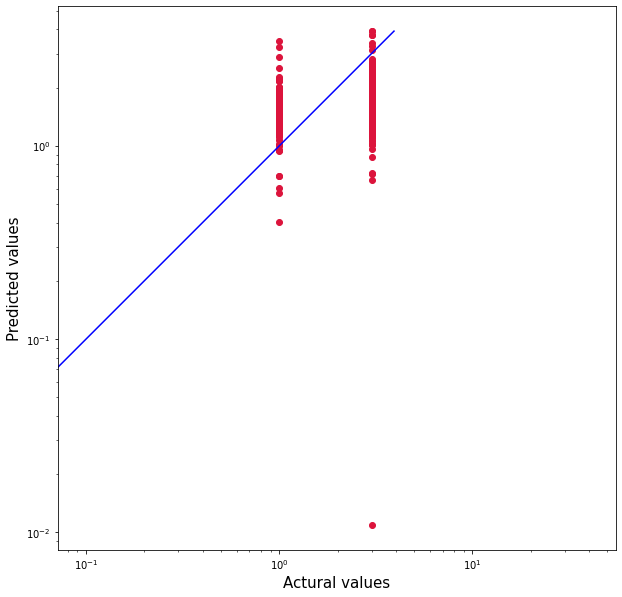

In [26]:
'''
Trực quan hoá dữ liệu dự báo và thực tế của mô hình trên tập test
'''
y_test_pred = model.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson' )
plt.yscale('log')
plt.xscale('log')

p1=max(max(y_test_pred),max(y_test))
p2=min(min(y_test_pred),min(y_test))

plt.plot([p1,p2],[p1,p2],'b-')

plt.xlabel('Actural values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.show()

In [27]:
X_train_with_constant = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       home_team_result   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     14.51
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           2.22e-60
Time:                        19:53:44   Log-Likelihood:                -3539.1
No. Observations:                2204   AIC:                             7134.
Df Residuals:                    2176   BIC:                             7294.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5425      0.293      5.259      0.0

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
'''
Xây dựng mô hình hồi quy đa biến
Tỷ lệ cá cược có ảnh hưởng đến đội khách thắng không

'''

'\nXây dựng mô hình hồi quy đa biến\nTỷ lệ cá cược có ảnh hưởng đến đội khách thắng không\n\n'

In [29]:
X=detailed_matches_home[['B365H',
'B365D',
'B365A',
'BWH',
'BWD',
'BWA',
'IWH',
'IWD',
'IWA',
'LBH',
'LBD',
'LBA',
'PSH',
'PSD',
'PSA',
'WHH',
'WHD',
'WHA',
'SJH',
'SJD',
'SJA',
'VCH',
'VCD',
'VCA',
'GBH',
'GBD',
'GBA',
'BSH',
'BSD',
'BSA'
]]
y=detailed_matches_home['away_team_result']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
'''
Đánh giá mô hình: có rất nhiều phương pháp đánh giá
'''
print('Score: ',model.score(X_train,y_train))
print('Score: ',model.score(X_test,y_test))

Score:  -0.561302639061414
Score:  -0.6159854377129275


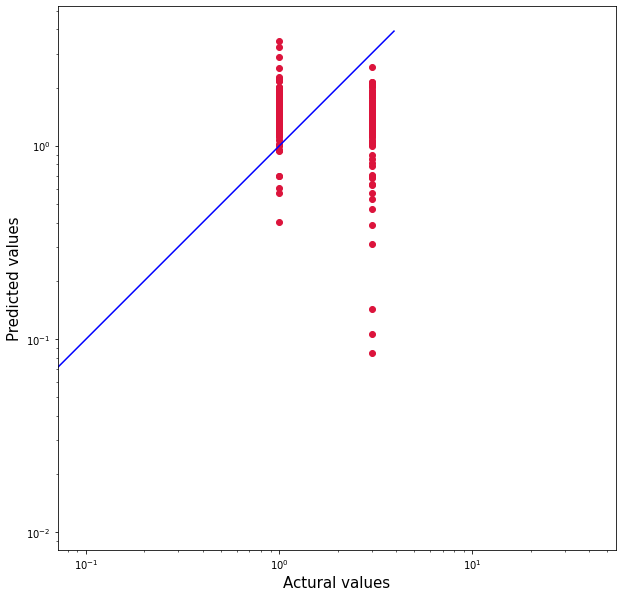

In [32]:
'''
Trực quan hoá dữ liệu dự báo và thực tế của mô hình trên tập test
'''
y_test_pred = model.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson' )
plt.yscale('log')
plt.xscale('log')

p1=max(max(y_test_pred),max(y_test))
p2=min(min(y_test_pred),min(y_test))

plt.plot([p1,p2],[p1,p2],'b-')

plt.xlabel('Actural values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.show()

In [33]:
X_train_with_constant = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       away_team_result   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     13.96
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           7.92e-58
Time:                        19:53:46   Log-Likelihood:                -3477.3
No. Observations:                2204   AIC:                             7011.
Df Residuals:                    2176   BIC:                             7170.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9643      0.285      3.381      0.0

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
